In [1]:
#!/usr/bin/env python
%matplotlib inline  

#makes AMP module reload
%load_ext autoreload
%autoreload 2
    
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import pandas as pd
from scipy.stats import pearsonr,spearmanr

#pull in the classes to do the sims!
import AMPmodule

import resource
resource.setrlimit(resource.RLIMIT_NOFILE, (1000,-1)) #allow many plots



ppt: 1 , exposed: 50 , transmission ratio (conc/IC50): 1e-10
breakthrough: 55.27999999999895


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


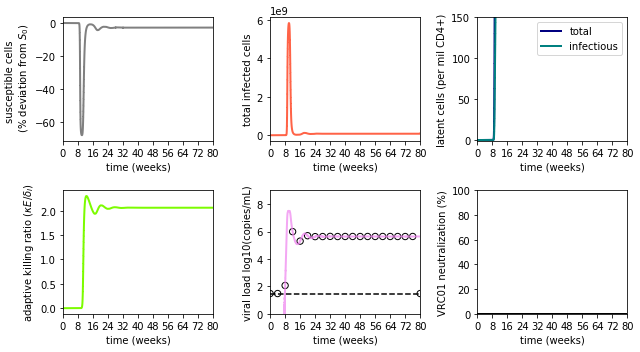

In [2]:
#simple tests for single participant without VRC01, infected on day 50

VD=np.array(pd.read_csv('data/viral_dynamics.csv',usecols=range(1,8)))

vdset=4 #pick the viral dynamics set

p1=AMPmodule.participant(name=1, et=50, tF=560, stop2=False, 
                         A0=1, vdp=VD[vdset,:], pkp=[1e-5,0,0,0], pdp=[1e5,1], v_flg=True)

t,sol=p1.vd_sim()
tAb = np.linspace(0,560,1e3) #time for antibody dose

AMPmodule.simplot(t,sol,tAb,p1,'sto_model-natural')


ppt: 1 , exposed: 50 , transmission ratio (conc/IC50): 3.7517561350643174
clearance: 51.81999999999964


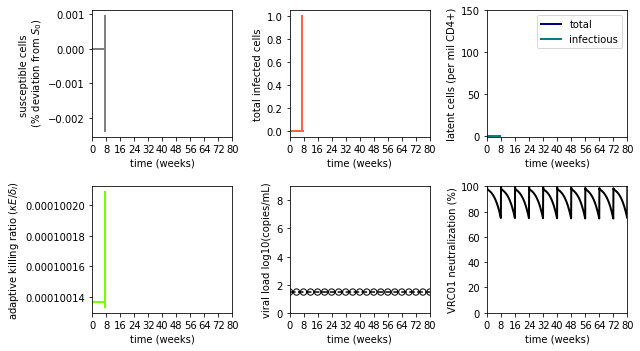

In [3]:
#simple tests for single participant with VRC01

PK=np.array(pd.read_csv('data/PK10.csv',usecols=range(1,5)))
PD=np.array(pd.read_csv('data/PDall.csv',usecols=range(1,3)))

vdset=4 #pick the viral dynamics set
pkset=2
pdset=93

p2=AMPmodule.participant(name=1, et=50, tF=560, stop2=False, 
                         A0=1, vdp=VD[vdset,:], pkp=PK[pkset,:], pdp=PD[pdset,:], v_flg=True)

t,sol=p2.vd_sim()
AMPmodule.simplot(t,sol,tAb,p2,'sto_model-VRC01')



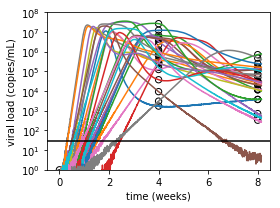

In [4]:
#try all viral dynamics parameter sets without VRC01 in a single dose interval

etf=0 #how to space out for plotting
plt.figure(figsize=(4,3))
for i in range(len(VD)):
    p=AMPmodule.participant(name=1, et=i*etf, tF=8*7+1, stop2=False, A0=1, 
                  vdp=VD[i,:], pkp=[1e-5,0,0,0], pdp=[1e5,1], v_flg=False)

    t,sol=p.vd_sim()
    plt.semilogy(t/7,sol[:,6]/p.vol*1e3)
    plt.scatter(p.obs_times/7,p.obs+0.7**i,facecolors='none',edgecolors='k',s=40)

plt.xlabel('time (weeks)')
plt.ylabel('viral load (copies/mL)')
plt.ylim([1,1e8])
plt.yticks(np.logspace(0,8,9))
plt.axhline(30,color='k')
plt.tight_layout()
plt.xlim([-0.5,8.5])

plt.tight_layout()
plt.savefig('figures/sto_model-natural_all.pdf',dpi=600)


name: 0 conc ratio: 1e-10 first pos time: 168.00108768460845 first pos VL: 3977.81648
name: 1 conc ratio: 1e-10 first pos time: 56.00465800802881 first pos VL: 20116937.58745
name: 2 conc ratio: 1e-10 first pos time: 224.00026645881672 first pos VL: 1126197.35852
name: 3 conc ratio: 1e-10 first pos time: 0 first pos VL: 0
name: 4 conc ratio: 1e-10 first pos time: 532.0054132625241 first pos VL: 10299074.790070001
name: 5 conc ratio: 1e-10 first pos time: 168.0000112158134 first pos VL: 1036922.73513
name: 6 conc ratio: 1e-10 first pos time: 56.00507667897683 first pos VL: 24417789.55133
name: 7 conc ratio: 1e-10 first pos time: 252.00875347504893 first pos VL: 4501002.6633
name: 8 conc ratio: 1e-10 first pos time: 504.0042322707333 first pos VL: 27387192.250200003
name: 9 conc ratio: 1e-10 first pos time: 0 first pos VL: 0
name: 10 conc ratio: 1e-10 first pos time: 112.0069680134711 first pos VL: 7575096.5419499995
name: 11 conc ratio: 1e-10 first pos time: 0 first pos VL: 0
name: 12 c

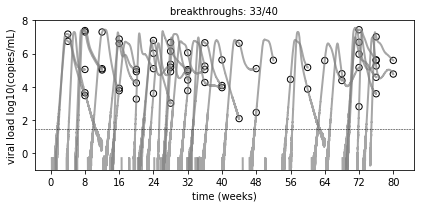

In [5]:
#now simple test of contrl trial in 

#%time 
tr=AMPmodule.trial(name='test', nps=40, tF=560, dose=0, clade='B', 
                   rfrac=0, A0=1, iv_phi=1, maxIC50=50, 
                   v_flg=True, keep_flg=2)

#plot trial outcome
plt.figure(figsize=(6,3))
for ip in range(tr.nps):
    plt.scatter(tr.obz[0][ip][tr.obz[1][ip]>30]/7,
                np.log10(tr.obz[1][ip][tr.obz[1][ip]>30]),
                facecolors='none',edgecolors='k',s=40)#,c=plt.cm.jet(ip))#1.4**ip),alpha=0.7)
    plt.plot(tr.sim[0][ip][tr.sim[1][ip]>-3]/7,
             tr.sim[1][ip][tr.sim[1][ip]>-3],
             lw=2,color='gray',alpha=0.7)    

plt.axhline(np.log10(30),color='k',ls='--',lw=0.5)
plt.ylim([-1,8])
plt.ylabel('viral load log10(copies/mL)')
plt.xlabel('time (weeks)')
plt.xticks(range(0,82,8))#,fontsize=8)
plt.title('breakthroughs: '+str(sum(tr.brks>0))+'/'+str(tr.nps),fontsize=10)
#plt.legend(['breakthroughs: '+str(sum(tr.brks>0))+'/'+str(tr.nps)],fontsize=10)
plt.tight_layout()
plt.savefig('figures/trial_ctltest.pdf',dpi=600)

name: 0 conc ratio: 237.0347982451456 first pos time: 0 first pos VL: 0
name: 1 conc ratio: 2.32296840524217 first pos time: 0 first pos VL: 0
name: 2 conc ratio: 23.942569807533975 first pos time: 0 first pos VL: 0
name: 3 conc ratio: 10.58351939786463 first pos time: 0 first pos VL: 0
name: 4 conc ratio: 3.492935784521336 first pos time: 0 first pos VL: 0
name: 5 conc ratio: 11.162128030317376 first pos time: 0 first pos VL: 0
name: 6 conc ratio: 47.80031027205419 first pos time: 0 first pos VL: 0
name: 7 conc ratio: 37.88816767015886 first pos time: 0 first pos VL: 0
name: 8 conc ratio: 0.5838357012043838 first pos time: 0 first pos VL: 0
name: 9 conc ratio: 121.4749805122325 first pos time: 0 first pos VL: 0
name: 10 conc ratio: 69.67888603470612 first pos time: 0 first pos VL: 0
name: 11 conc ratio: 0.4998846552781584 first pos time: 112.00535629999328 first pos VL: 28321.72356
name: 12 conc ratio: 3.060833876950613 first pos time: 336.00961477916997 first pos VL: 10230793.12968
n

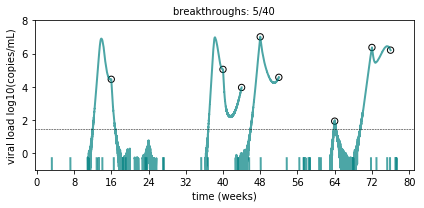

In [6]:
#now simple test of trial including VRC01
%time tr=AMPmodule.trial(name='test', nps=40, tF=560, dose=10, clade='C', rfrac=0, A0=1, iv_phi=1, maxIC50=50, v_flg=True, keep_flg=2)

#plot trial outcome
plt.figure(figsize=(6,3))
for ip in range(tr.nps):
    plt.scatter(tr.obz[0][ip][tr.obz[1][ip]>30]/7,
                np.log10(tr.obz[1][ip][tr.obz[1][ip]>30]),
                facecolors='none',edgecolors='k',s=40)#,c=plt.cm.jet(ip))#1.4**ip),alpha=0.7)
    #plt.scatter(tr.obz[0][ip]/7,np.log10(tr.obz[1][ip]+4e-4*1.1**ip),facecolors='none',edgecolors='k',s=40)#,c=plt.cm.jet(ip))#1.4**ip),alpha=0.7)
    plt.plot(tr.sim[0][ip][tr.sim[1][ip]>-3]/7,
             tr.sim[1][ip][tr.sim[1][ip]>-3],
             lw=2,color='teal',alpha=0.7)    

plt.axhline(np.log10(30),color='k',ls='--',lw=0.5)
plt.xticks(range(0,82,8))#,fontsize=8)
plt.ylim([-1,8])
plt.ylabel('viral load log10(copies/mL)')
plt.xlabel('time (weeks)')
plt.title('breakthroughs: '+str(sum(tr.brks>0))+'/'+str(tr.nps),fontsize=10)
plt.tight_layout()
plt.savefig('figures/trial_10test.pdf',dpi=600)

name: 0 conc ratio: 10.673415140240365 first pos time: 0 first pos VL: 0
name: 1 conc ratio: 144.8758160513893 first pos time: 0 first pos VL: 0
name: 2 conc ratio: 47.47600122890305 first pos time: 0 first pos VL: 0
name: 3 conc ratio: 63.65260617085077 first pos time: 0 first pos VL: 0
name: 4 conc ratio: 141.6756658385195 first pos time: 0 first pos VL: 0
name: 5 conc ratio: 223.46609331521725 first pos time: 0 first pos VL: 0
name: 6 conc ratio: 14.961419452503838 first pos time: 0 first pos VL: 0
name: 7 conc ratio: 113.54122353741626 first pos time: 0 first pos VL: 0
name: 8 conc ratio: 9.088337150494828 first pos time: 0 first pos VL: 0
name: 9 conc ratio: 59.87638307383516 first pos time: 0 first pos VL: 0
name: 10 conc ratio: 225.9825000089562 first pos time: 0 first pos VL: 0
name: 11 conc ratio: 413.08198042278434 first pos time: 0 first pos VL: 0
name: 12 conc ratio: 44.784795631141876 first pos time: 0 first pos VL: 0
name: 13 conc ratio: 20.338140883122218 first pos time:

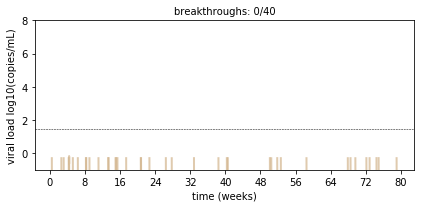

In [7]:
#now simple test of trial including VRC01
%time tr=AMPmodule.trial(name='test', nps=40, tF=560, dose=30, clade='C', rfrac=0, A0=1, iv_phi=1, maxIC50=50, v_flg=True, keep_flg=2)

#plot trial outcome
plt.figure(figsize=(6,3))
for ip in range(tr.nps):
    plt.scatter(tr.obz[0][ip][tr.obz[1][ip]>30]/7,
                np.log10(tr.obz[1][ip][tr.obz[1][ip]>30]),
                facecolors='none',edgecolors='k',s=40)#,c=plt.cm.jet(ip))#1.4**ip),alpha=0.7)
    #plt.scatter(tr.obz[0][ip]/7,np.log10(tr.obz[1][ip]+4e-4*1.1**ip),facecolors='none',edgecolors='k',s=40)#,c=plt.cm.jet(ip))#1.4**ip),alpha=0.7)
    plt.plot(tr.sim[0][ip][tr.sim[1][ip]>-3]/7,
             tr.sim[1][ip][tr.sim[1][ip]>-3],
             lw=2,color='tan',alpha=0.7)
    
plt.axhline(np.log10(30),color='k',ls='--',lw=0.5)
plt.xticks(range(0,82,8))#,fontsize=8)
plt.ylim([-1,8])
plt.ylabel('viral load log10(copies/mL)')
plt.xlabel('time (weeks)')
plt.title('breakthroughs: '+str(sum(tr.brks>0))+'/'+str(tr.nps),fontsize=10)
plt.tight_layout()
plt.savefig('figures/trial_30test.pdf',dpi=600)

In [8]:
#compute predicted Panglossian PE

#clade B trial, 100 repeats
reps=10
Bpl=AMPmodule.trial(name='test', nps=40*reps, tF=560, dose=0, clade='B', rfrac=0, A0=1, iv_phi=1, maxIC50=50, v_flg=False, keep_flg=0)
B10=AMPmodule.trial(name='test', nps=40*reps, tF=560, dose=10, clade='B', rfrac=0, A0=1, iv_phi=1, maxIC50=50, v_flg=False, keep_flg=0)
B30=AMPmodule.trial(name='test', nps=40*reps, tF=560, dose=30, clade='B', rfrac=0, A0=1, iv_phi=1, maxIC50=50, v_flg=False, keep_flg=0)

print('PE10',1-sum(B10.brks>0)/sum(Bpl.brks>0))
print('PE30',1-sum(B30.brks>0)/sum(Bpl.brks>0))
      


KeyboardInterrupt: 

In [ ]:
#clade C trial, 100 repeats
Cpl=AMPmodule.trial(name='test', nps=40*reps, tF=560, dose=0, clade='C', rfrac=0, A0=1, iv_phi=1, maxIC50=50, v_flg=False, keep_flg=0)
C10=AMPmodule.trial(name='test', nps=40*reps, tF=560, dose=10, clade='C', rfrac=0, A0=1, iv_phi=1, maxIC50=50, v_flg=False, keep_flg=0)
C30=AMPmodule.trial(name='test', nps=40*reps, tF=560, dose=30, clade='C', rfrac=0, A0=1, iv_phi=1, maxIC50=50, v_flg=False, keep_flg=0)

print('PE10',1-sum(C10.brks>0)/sum(Cpl.brks>0))
print('PE30',1-sum(C30.brks>0)/sum(Cpl.brks>0))
